In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
plt.style.use('ggplot')

In [4]:
!wget https://raw.githubusercontent.com/Daihongchen/Datasets/master/haberman.csv

--2020-09-09 03:04:25--  https://raw.githubusercontent.com/Daihongchen/Datasets/master/haberman.csv
Resolving raw.githubusercontent.com... 151.101.52.133
Connecting to raw.githubusercontent.com|151.101.52.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3103 (3.0K) [text/plain]
Saving to: 'haberman.csv'

haberman.csv        100%[===================>]   3.03K  --.-KB/s    in 0s      

2020-09-09 03:04:25 (31.5 MB/s) - 'haberman.csv' saved [3103/3103]



In [11]:
filename = 'haberman.csv'
columns = ['age', 'year', 'nodes', 'class']
df = pd.read_csv(filename, header=None, names=columns)

In [12]:
df.head()

,age,year,nodes,class
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [13]:
report = df.describe()
print(report)

              age        year       nodes       class
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


In [23]:
print(df['class'].value_counts())
print(df['class'].value_counts(normalize=True))

1    225
2     81
Name: class, dtype: int64
1    0.735294
2    0.264706
Name: class, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1178317b8>,
      dtype=object)

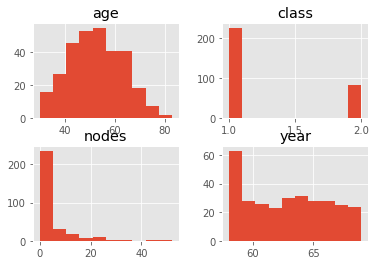

In [21]:
df.hist()

In [28]:
counter = Counter(df['class'].values)
for k, v in counter.items():
    per = v / len(df['class']) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))
#     print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=225, Percentage=73.529%
Class=2, Count=81, Percentage=26.471%


## Model Test and Baseline Result

In [40]:
from collections import Counter
from numpy import mean
from numpy import std
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import brier_score_loss
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier

In [34]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [36]:
y = LabelEncoder().fit_transform(y)

NameError: name 'LabelEncoder' is not defined